# Laboratorio 2

## Mineria de Datos - Seccion 20

### Grupo 3: Andrés de la Roca y Jun Woo Lee

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

In [44]:
data = pd.read_csv('breast-cancer-wisconsin.data', names=['id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'])

## Limpieza de variables

In [45]:
data

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


#### Limpieza de columna bare_nuclei

In [47]:
# Se limpia la columna bare_nuclei, ya que los valores son string en lugar de int y tiene valores '?'
bare_nucleiArray = []
for item in data['bare_nuclei']:
    if item == '?':
        bare_nucleiArray.append(None)
    else:
        bare_nucleiArray.append(int(item))

data['bare_nuclei'] = bare_nucleiArray

data['bare_nuclei']        



0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
       ... 
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: bare_nuclei, Length: 699, dtype: float64

In [48]:
nan_count = data.isnull().sum()

nan_count #Visualizacion de cuantos valores null hay en la data

id                              0
clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

#### Limpieza de valores unicos segun id

In [52]:
data.nunique() #Visualizacion de valores unicos en la data

#NOTA: el id por defecto deberia de ser 699 valores unicos, al tener solo 645
#se infiere que hay valores duplicados que se deben de limpiar para obtener
#datos mas precisos y sin sesgo.

id                             645
clump_thickness                 10
uniformity_cell_size            10
uniformity_cell_shape           10
marginal_adhesion               10
single_epithelial_cell_size     10
bare_nuclei                     10
bland_chromatin                 10
normal_nucleoli                 10
mitoses                          9
class                            2
dtype: int64

In [55]:
#Eliminacion de filas duplicadas segun el id.

data = data.drop_duplicates(subset=['id'], keep='first')


In [59]:
data.shape #Comprobacion del cambio de forma del dataframe

(645, 11)

#### Reemplazar valores faltantes

<AxesSubplot: >

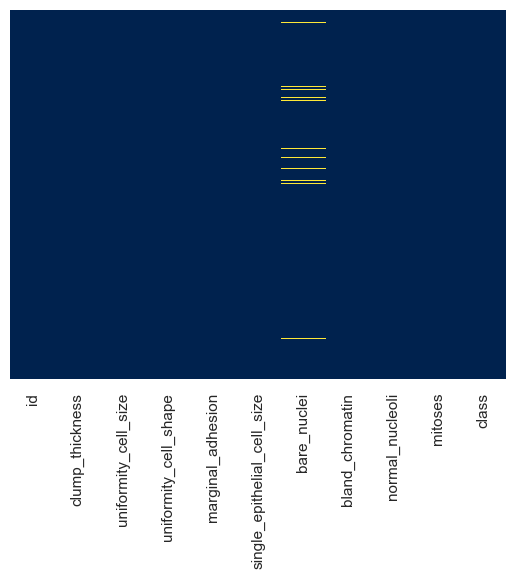

In [69]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap='cividis')

In [70]:
data = clean(data, columns="bare_nuclei", method="fillmissing")

In [74]:
#Convert bare_nuclei column's values from float to int
data['bare_nuclei'] = data['bare_nuclei'].astype(np.int64)

In [75]:
data.dtypes

id                             int64
clump_thickness                int64
uniformity_cell_size           int64
uniformity_cell_shape          int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

In [81]:
collection = []
for i in data:
    collection.append(data[i].unique())

collection

[array([ 1000025,  1002945,  1015425,  1016277,  1017023,  1017122,
         1018099,  1018561,  1033078,  1035283,  1036172,  1041801,
         1043999,  1044572,  1047630,  1048672,  1049815,  1050670,
         1050718,  1054590,  1054593,  1056784,  1057013,  1059552,
         1065726,  1066373,  1066979,  1067444,  1070935,  1071760,
         1072179,  1074610,  1075123,  1079304,  1080185,  1081791,
         1084584,  1091262,  1096800,  1099510,  1100524,  1102573,
         1103608,  1103722,  1105257,  1105524,  1106095,  1106829,
         1108370,  1108449,  1110102,  1110503,  1110524,  1111249,
         1112209,  1113038,  1113483,  1113906,  1115282,  1115293,
         1116116,  1116132,  1116192,  1116998,  1117152,  1118039,
         1120559,  1121732,  1121919,  1123061,  1124651,  1125035,
         1126417,  1131294,  1132347,  1133041,  1133136,  1136142,
         1137156,  1143978,  1147044,  1147699,  1147748,  1148278,
         1148873,  1152331,  1155546,  1156272, 

#### Limpieza de variables que no se utilizaran

In [ ]:
# Las variables que se limpiaran a continuacion son las que no se utilizaran
# debido a no ser relevantes en el objetivo de predecir si el tumor
# es benigno o maligno en el paciente.
# (Cada uno contara con su debida justificacion)

## Desarrollo de modelo de clasificacion

### Regresion Logistica

In [51]:
x = data.iloc[:, :-1].values #Valores varios
y = data.iloc[:, -1].values #Class (Beningo o Maligno)

### Regresion K-NN